# Polynomial Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
data = pd.read_csv("Position_Salaries.csv")

In [7]:
data.info

<bound method DataFrame.info of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [8]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [58]:
X = data.iloc[:,1:2]
y = data.iloc[:,-1]

### Fitting a Linear Model
I'm first going to create a linear model for this data, to have it as a comparison against the polynomial model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Fitting a Polynomial Model

In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [98]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [99]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualizing the Linear Regression

Text(0, 0.5, 'Salary')

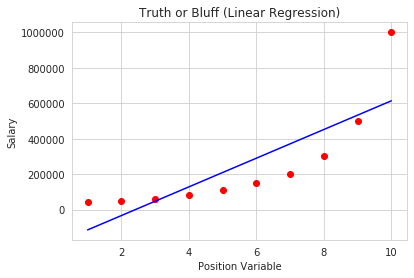

In [81]:
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Variable")
plt.ylabel("Salary")

The data, as expected, has an obvious exponential trend, attributing to the poor fit of the linear model. Lets review the exponential fit.

### Visualizing the Polynomial Regression (Degree 2)

Text(0, 0.5, 'Salary')

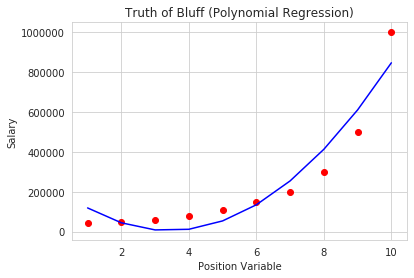

In [100]:
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "blue")
plt.title("Truth of Bluff (Polynomial Regression [Degree = 2])")
plt.xlabel("Position Variable")
plt.ylabel("Salary")

This model provides a clearly superior fit for the model.

### Visualizing the Polynomial Regression (Degree 3)

In [102]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [103]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salary')

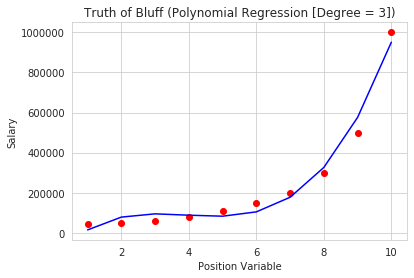

In [104]:
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "blue")
plt.title("Truth of Bluff (Polynomial Regression [Degree = 3])")
plt.xlabel("Position Variable")
plt.ylabel("Salary")

Again, the model is clearly superior to the previous model. Lets try a model of degree 4, and see how it fits to the data!

### Visualizing the Polynomial Regression (Degree 4)

In [105]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [106]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salary')

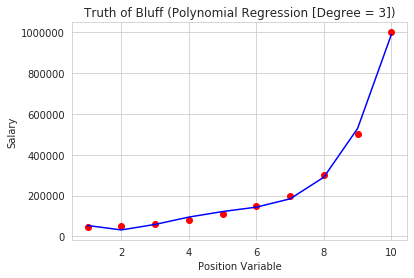

In [107]:
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "blue")
plt.title("Truth of Bluff (Polynomial Regression [Degree = 3])")
plt.xlabel("Position Variable")
plt.ylabel("Salary")

A nearly perfect fit!

### Predicting a New Result

In [118]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [121]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])